In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd
import os

In [2]:
# Path to your .shp file
shp_file_path = '../data/taxi_zones/taxi_zones.shp'

# Read the shapefile
zone_shp = gpd.read_file(shp_file_path)

cleaned_data = '../data/cleaned_data.csv'

data = pd.read_csv(cleaned_data)

zone_lookup_path = '../data/taxi_zone_lookup.csv'

zone_lookup = pd.read_csv(zone_lookup_path)

print(zone_shp.head())

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...  


In [3]:
print(zone_lookup.head())

   LocationID        Borough                     Zone service_zone
0           1            EWR           Newark Airport          EWR
1           2         Queens              Jamaica Bay    Boro Zone
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
3           4      Manhattan            Alphabet City  Yellow Zone
4           5  Staten Island            Arden Heights    Boro Zone


In [4]:
print(data.head())

  tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2024-01-01 00:57:55   2024-01-01 01:17:43              1.0           1.72   
1  2024-01-01 00:03:00   2024-01-01 00:09:36              1.0           1.80   
2  2024-01-01 00:17:06   2024-01-01 00:35:01              1.0           4.70   
3  2024-01-01 00:36:38   2024-01-01 00:44:56              1.0           1.40   
4  2024-01-01 00:46:51   2024-01-01 00:52:57              1.0           0.80   

   RatecodeID  PULocationID  DOLocationID  payment_type  fare_amount  extra  \
0         1.0           186            79             2         17.7    1.0   
1         1.0           140           236             1         10.0    3.5   
2         1.0           236            79             1         23.3    3.5   
3         1.0            79           211             1         10.0    3.5   
4         1.0           211           148             1          7.9    3.5   

   ...  pickup_month  pickup_day  pickup_wee

In [5]:
# Assuming the LocationID is consistent across datasets
merged_df = pd.merge(data, zone_shp[['LocationID', 'geometry']], left_on='PULocationID', right_on='LocationID', how='left')

In [6]:
# Group by the geometry column and sum up the pickups for each zone
pickup_counts = merged_df.groupby('geometry').size().reset_index(name='pickup_count')

In [7]:
gdf = gpd.GeoDataFrame(pickup_counts)

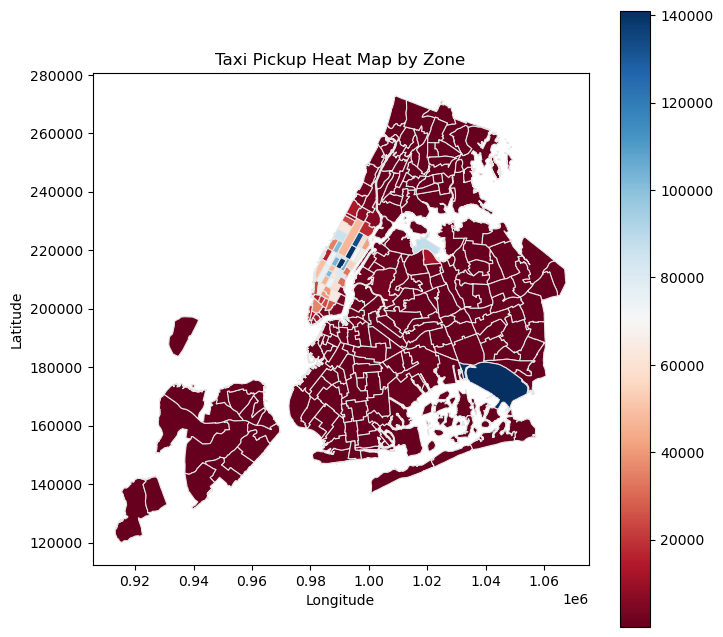

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
gdf.plot(column='pickup_count', cmap='RdBu', linewidth=0.8, ax=ax, edgecolor='0.9', legend=True)

# Set plot titles and axis labels
plt.title('Taxi Pickup Heat Map by Zone')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

Doing the same for dropoff locations

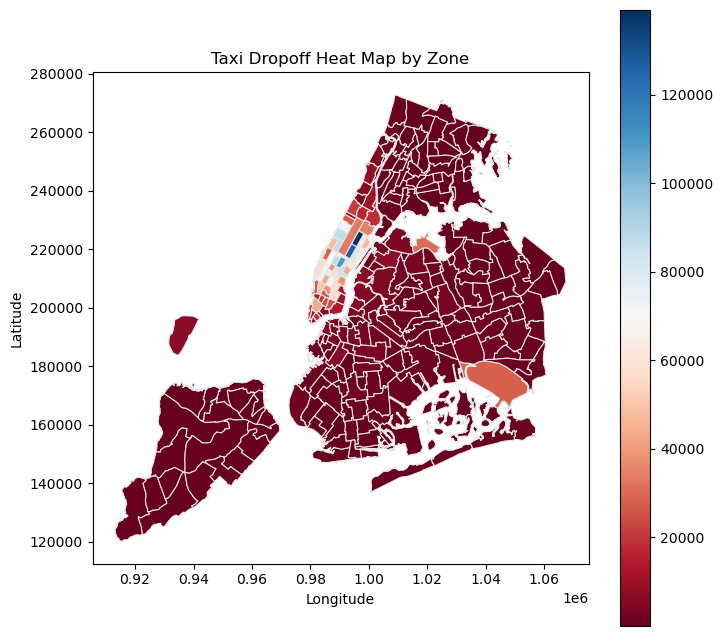

In [9]:
# Assuming the LocationID is consistent across datasets
merged_drop = pd.merge(data, zone_shp[['LocationID', 'geometry']], left_on='DOLocationID', right_on='LocationID', how='left')

# Group by the geometry column and sum up the pickups for each zone
dropoff_counts = merged_drop.groupby('geometry').size().reset_index(name='dropoff_count')

dropoff_gdf = gpd.GeoDataFrame(dropoff_counts)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dropoff_gdf.plot(column='dropoff_count', cmap='RdBu', linewidth=0.8, ax=ax, edgecolor='0.9', legend=True)

# Set plot titles and axis labels
plt.title('Taxi Dropoff Heat Map by Zone')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

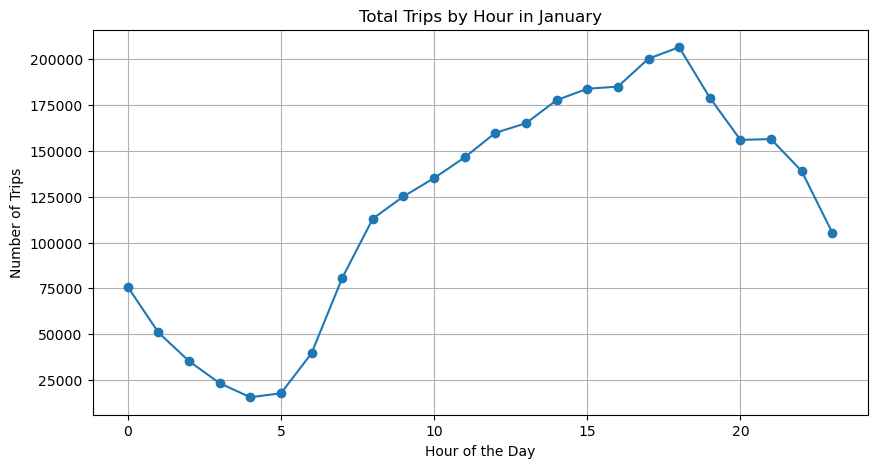

Max trips: 206635 at hour 18
Min trips: 15556 at hour 4


In [10]:
# Filter for January (assuming pickup_month represents the month)
df_january = data[data['pickup_month'] == 1]

# Count total trips by hour
trips_by_hour = df_january.groupby('pickup_hour').size()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(trips_by_hour.index, trips_by_hour.values, marker='o')
plt.title('Total Trips by Hour in January')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

# Print max and min number of trips and their corresponding hours
max_trips = trips_by_hour.max()
min_trips = trips_by_hour.min()
max_hour = trips_by_hour.idxmax()
min_hour = trips_by_hour.idxmin()

print(f"Max trips: {max_trips} at hour {max_hour}")
print(f"Min trips: {min_trips} at hour {min_hour}")

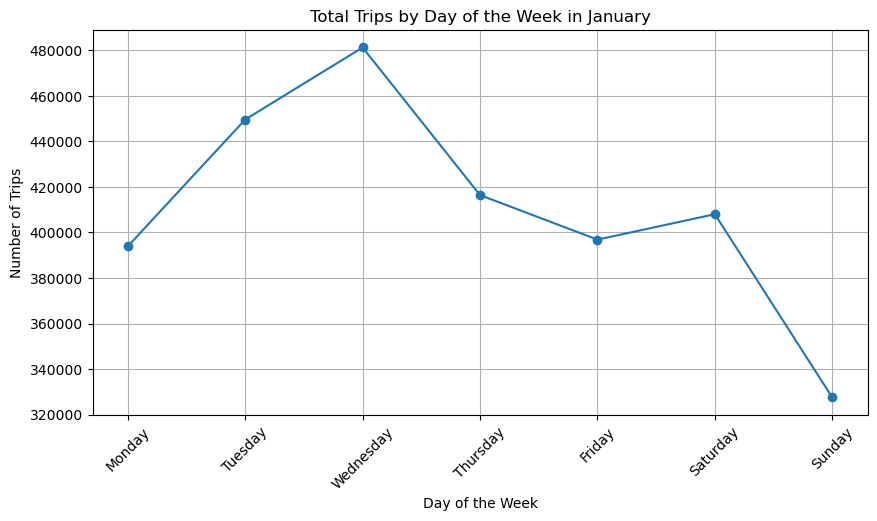

In [69]:
# Create a dictionary to map numbers to weekday names
days_of_week = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Count total trips by day of the week
trips_by_day = df_january.groupby('pickup_weekday').size()

# Replace numeric days with weekday names
trips_by_day.index = trips_by_day.index.map(days_of_week)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(trips_by_day.index, trips_by_day.values, marker='o')
plt.title('Total Trips by Day of the Week in January')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

# # Count total trips by hour
# trips_by_day = df_january.groupby('pickup_day').size()

# # Plotting
# plt.figure(figsize=(10, 5))
# plt.plot(trips_by_day.index, trips_by_day.values, marker='o')
# plt.title('Total Trips by Hour in January')
# plt.xlabel('Day of the month')
# plt.ylabel('Number of Trips')
# plt.grid(True)
# plt.show()

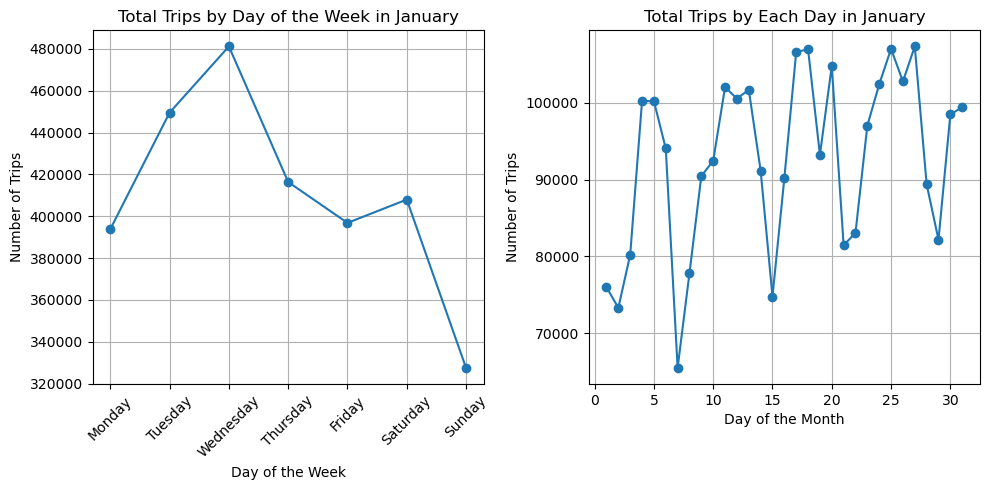

In [13]:
# Count total trips by day of the week
trips_by_day_of_week = df_january.groupby('pickup_weekday').size()

# Replace numeric days with weekday names
trips_by_day_of_week.index = trips_by_day_of_week.index.map(days_of_week)

# Count total trips by each specific date
trips_by_date = df_january.groupby('pickup_day').size()

# Plot 1: Total trips by day of the week
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # First subplot in a 1x2 grid
plt.plot(trips_by_day_of_week.index, trips_by_day_of_week.values, marker='o')
plt.title('Total Trips by Day of the Week in January')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.xticks(rotation=45)

# Plot 2: Total trips by each specific day in January
plt.subplot(1, 2, 2)  # Second subplot in a 1x2 grid
plt.plot(trips_by_date.index, trips_by_date.values, marker='o')
plt.title('Total Trips by Each Day in January')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Trips')
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

/var/folders/lq/32167fz10179drz_rw4nmmy40000gn/T/ipykernel_13370/169272401.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_january['pickup_weekday_name'] = df_january['pickup_weekday'].map(days_of_week)


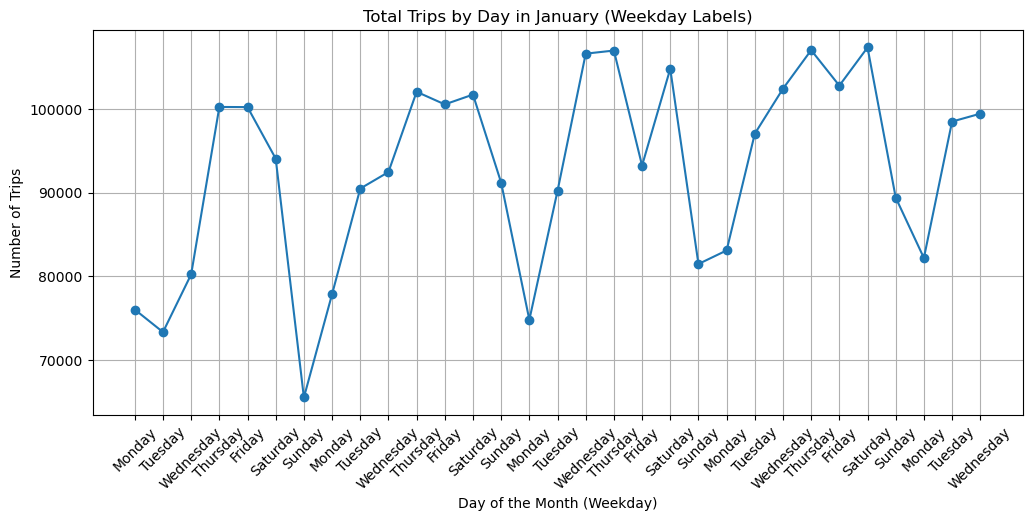

In [14]:
# Create a dictionary to map numbers to weekday names
days_of_week = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Filter for January (assuming pickup_month represents the month)
df_january = data[data['pickup_month'] == 1]

# Count total trips by each specific day of the month
trips_by_day_of_month = df_january.groupby('pickup_day').size()

# Map the day of the month to the corresponding weekday
df_january['pickup_weekday_name'] = df_january['pickup_weekday'].map(days_of_week)

# Create a list of weekday names corresponding to the day of the month
weekday_labels = df_january.drop_duplicates('pickup_day').sort_values('pickup_day')['pickup_weekday_name'].values

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(trips_by_day_of_month.index, trips_by_day_of_month.values, marker='o')
plt.title('Total Trips by Day in January (Weekday Labels)')
plt.xlabel('Day of the Month (Weekday)')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.xticks(trips_by_day_of_month.index, weekday_labels, rotation=45)  # Show weekdays instead of numeric dates
plt.show()

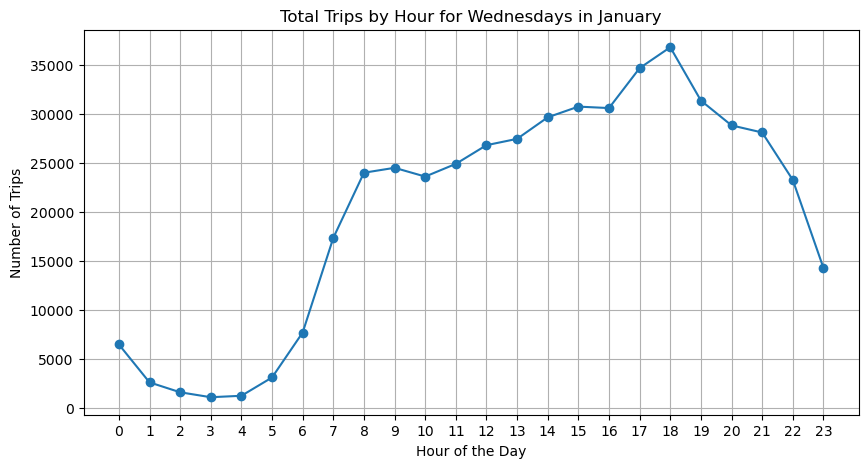

In [15]:
# Filter for only Wednesdays (where pickup_weekday == 2, as 2 corresponds to Wednesday)
df_wednesdays = df_january[df_january['pickup_weekday'] == 2]

# Count total trips by hour for all Wednesdays
trips_by_hour_wednesday = df_wednesdays.groupby('pickup_hour').size()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(trips_by_hour_wednesday.index, trips_by_hour_wednesday.values, marker='o')
plt.title('Total Trips by Hour for Wednesdays in January')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.xticks(range(24))  # Ensure that all 24 hours are represented on the x-axis
plt.show()

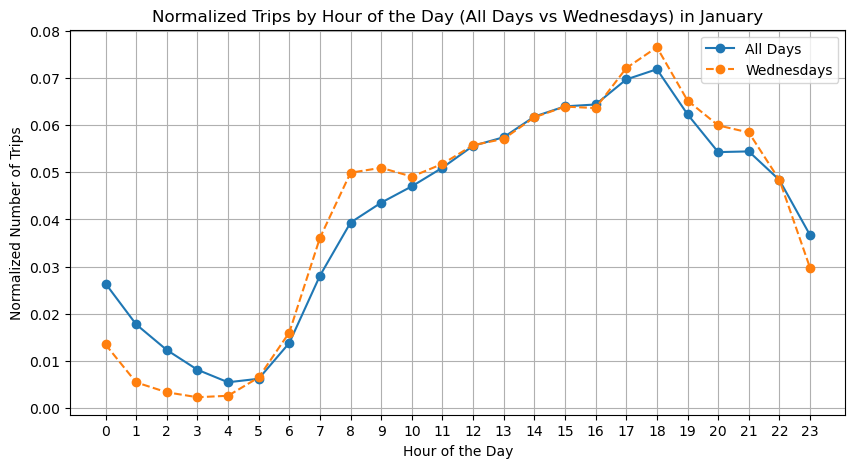

In [16]:
# Count total trips by hour for all days in January
trips_by_hour_all = df_january.groupby('pickup_hour').size()

# Count total trips by hour for Wednesdays in January
trips_by_hour_wednesday = df_wednesdays.groupby('pickup_hour').size()

# Normalize the counts (by dividing by the total number of trips in each group)
trips_by_hour_all_normalized = trips_by_hour_all / trips_by_hour_all.sum()
trips_by_hour_wednesday_normalized = trips_by_hour_wednesday / trips_by_hour_wednesday.sum()

# Plotting
plt.figure(figsize=(10, 5))

# Plot normalized trips for all days in January
plt.plot(trips_by_hour_all_normalized.index, trips_by_hour_all_normalized.values, marker='o', label='All Days')

# Plot normalized trips for Wednesdays in January
plt.plot(trips_by_hour_wednesday_normalized.index, trips_by_hour_wednesday_normalized.values, marker='o', label='Wednesdays', linestyle='--')

# Adding title and labels
plt.title('Normalized Trips by Hour of the Day (All Days vs Wednesdays) in January')
plt.xlabel('Hour of the Day')
plt.ylabel('Normalized Number of Trips')
plt.grid(True)
plt.xticks(range(24))  # Ensure that all 24 hours are represented on the x-axis
plt.legend()

# Show plot
plt.show()

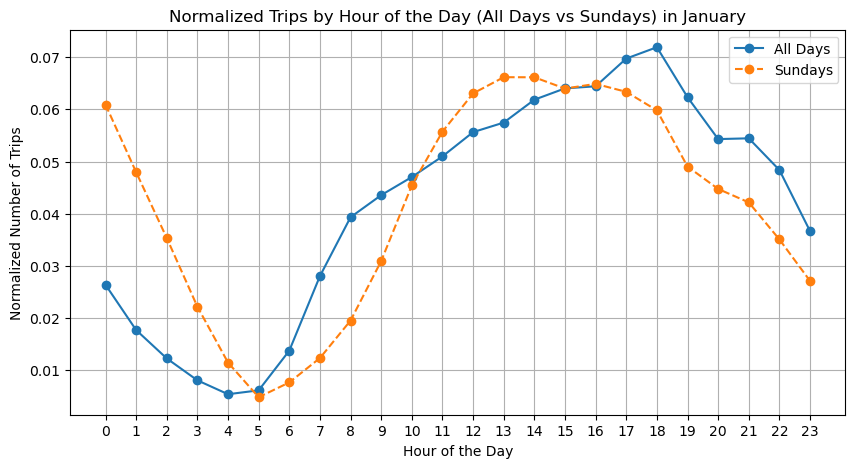

In [22]:
# Filter for only Wednesdays (where pickup_weekday == 2, as 2 corresponds to Wednesday)
df_sundays = df_january[df_january['pickup_weekday'] == 6]

# Count total trips by hour for all days in January
trips_by_hour_all = df_january.groupby('pickup_hour').size()

# Count total trips by hour for Wednesdays in January
trips_by_hour_sunday = df_sundays.groupby('pickup_hour').size()

# Normalize the counts (by dividing by the total number of trips in each group)
trips_by_hour_all_normalized = trips_by_hour_all / trips_by_hour_all.sum()
trips_by_hour_sunday_normalized = trips_by_hour_sunday / trips_by_hour_sunday.sum()

# Plotting
plt.figure(figsize=(10, 5))

# Plot normalized trips for all days in January
plt.plot(trips_by_hour_all_normalized.index, trips_by_hour_all_normalized.values, marker='o', label='All Days')

# Plot normalized trips for Wednesdays in January
plt.plot(trips_by_hour_sunday_normalized.index, trips_by_hour_sunday_normalized.values, marker='o', label='Sundays', linestyle='--')

# Adding title and labels
plt.title('Normalized Trips by Hour of the Day (All Days vs Sundays) in January')
plt.xlabel('Hour of the Day')
plt.ylabel('Normalized Number of Trips')
plt.grid(True)
plt.xticks(range(24))  # Ensure that all 24 hours are represented on the x-axis
plt.legend()

# Show plot
plt.show()

In [23]:
from scipy.stats import ks_2samp

# Perform Kolmogorov-Smirnov test
ks_stat, p_value = ks_2samp(trips_by_hour_all_normalized, trips_by_hour_wednesday_normalized)

print(f"KS Statistic: {ks_stat}")
print(f"P-value: {p_value}")

KS Statistic: 0.16666666666666666
P-value: 0.9024001944012529


In [24]:
from scipy.stats import chisquare

# Chi-Square Test (Wednesdays as observed, All days as expected)
chi2_stat, p_value = chisquare(trips_by_hour_wednesday_normalized, f_exp=trips_by_hour_all_normalized)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

Chi-Square Statistic: 0.03687360335551819
P-value: 1.0


In [25]:
from scipy.stats import pearsonr, spearmanr

# Pearson Correlation
pearson_corr, _ = pearsonr(trips_by_hour_all_normalized, trips_by_hour_wednesday_normalized)
print(f"Pearson Correlation: {pearson_corr}")

# Spearman Correlation
spearman_corr, _ = spearmanr(trips_by_hour_all_normalized, trips_by_hour_wednesday_normalized)
print(f"Spearman Correlation: {spearman_corr}")

Pearson Correlation: 0.976378039977748
Spearman Correlation: 0.9695652173913042


In [26]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(trips_by_hour_all_normalized, trips_by_hour_wednesday_normalized)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.406680710692507e-05


In [27]:
from scipy.stats import wasserstein_distance

# Calculate Wasserstein Distance
emd = wasserstein_distance(trips_by_hour_all_normalized, trips_by_hour_wednesday_normalized)
print(f"Earth Mover's Distance: {emd}")

Earth Mover's Distance: 0.003439436918346707


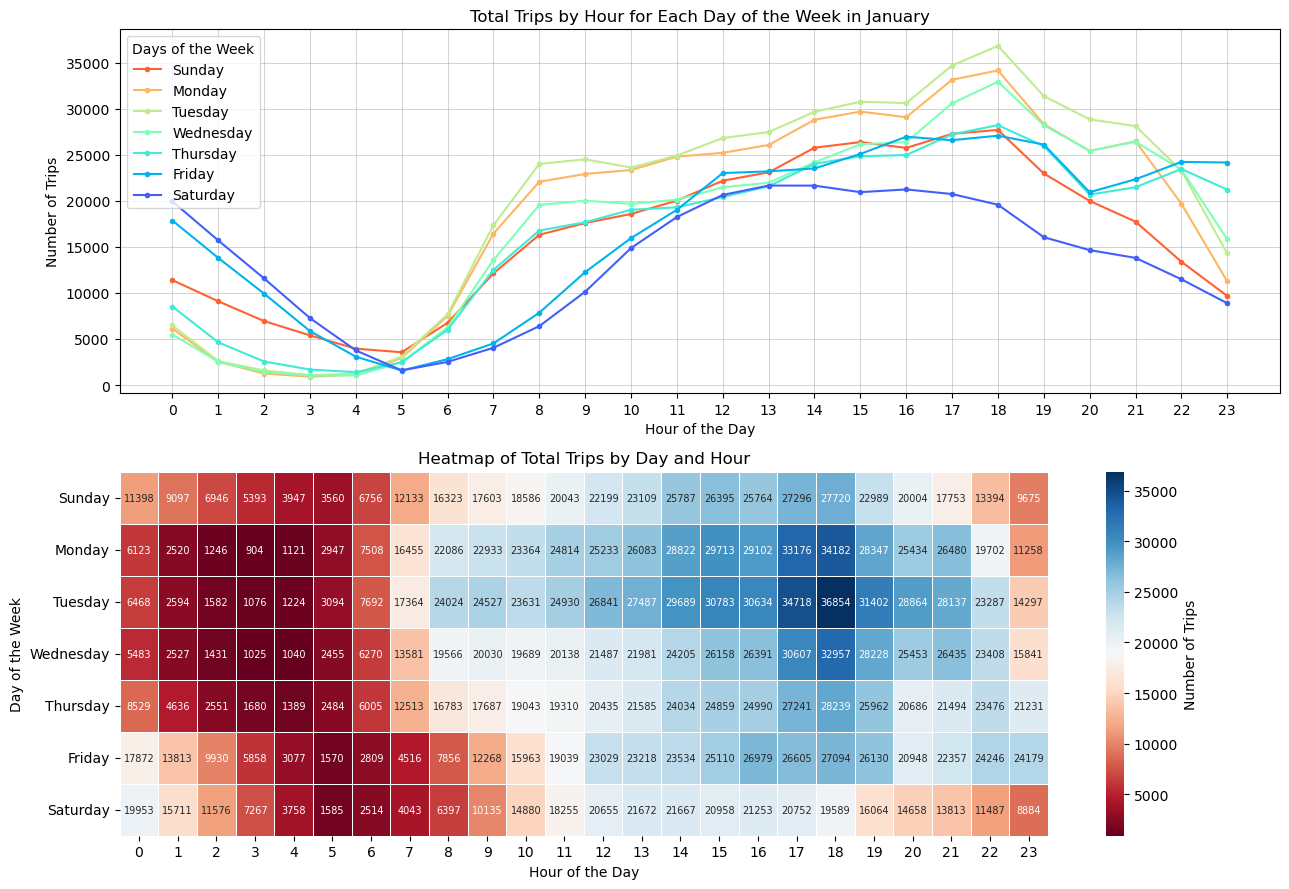

In [61]:
df_sundays = df_january[df_january['pickup_weekday'] == 0]
df_mondays = df_january[df_january['pickup_weekday'] == 1]
df_tuesdays = df_january[df_january['pickup_weekday'] == 2]
df_wednesdays = df_january[df_january['pickup_weekday'] == 3]
df_thursdays = df_january[df_january['pickup_weekday'] == 4]
df_fridays = df_january[df_january['pickup_weekday'] == 5]
df_saturdays = df_january[df_january['pickup_weekday'] == 6]

# Count total trips by hour for each day of the week
trips_by_hour_sunday = df_sundays.groupby('pickup_hour').size()
trips_by_hour_monday = df_mondays.groupby('pickup_hour').size()
trips_by_hour_tuesday = df_tuesdays.groupby('pickup_hour').size()
trips_by_hour_wednesday = df_wednesdays.groupby('pickup_hour').size()
trips_by_hour_thursday = df_thursdays.groupby('pickup_hour').size()
trips_by_hour_friday = df_fridays.groupby('pickup_hour').size()
trips_by_hour_saturday = df_saturdays.groupby('pickup_hour').size()

# Set a color palette from seaborn
colors = sns.color_palette("rainbow_r", 7)  # "tab10" provides 10 vibrant colors, using the first 7 for each day

# Create a figure with equal-sized subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 9), gridspec_kw={'height_ratios': [1, 1]})

# First subplot: Line plot for each day with specified colors
ax1.plot(trips_by_hour_sunday.index, trips_by_hour_sunday.values, marker='.', label='Sunday', color=colors[0])
ax1.plot(trips_by_hour_monday.index, trips_by_hour_monday.values, marker='.', label='Monday', color=colors[1])
ax1.plot(trips_by_hour_tuesday.index, trips_by_hour_tuesday.values, marker='.', label='Tuesday', color=colors[2])
ax1.plot(trips_by_hour_wednesday.index, trips_by_hour_wednesday.values, marker='.', label='Wednesday', color=colors[3])
ax1.plot(trips_by_hour_thursday.index, trips_by_hour_thursday.values, marker='.', label='Thursday', color=colors[4])
ax1.plot(trips_by_hour_friday.index, trips_by_hour_friday.values, marker='.', label='Friday', color=colors[5])
ax1.plot(trips_by_hour_saturday.index, trips_by_hour_saturday.values, marker='.', label='Saturday', color=colors[6])

ax1.set_title('Total Trips by Hour for Each Day of the Week in January')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Number of Trips')
ax1.grid(True, linewidth=0.4)
ax1.set_xticks(range(24))
ax1.legend(title="Days of the Week")

# Second subplot: Heatmap
# Combine all daily series into a DataFrame
trips_by_day_hour_df = pd.DataFrame({
    'Sunday': trips_by_hour_sunday,
    'Monday': trips_by_hour_monday,
    'Tuesday': trips_by_hour_tuesday,
    'Wednesday': trips_by_hour_wednesday,
    'Thursday': trips_by_hour_thursday,
    'Friday': trips_by_hour_friday,
    'Saturday': trips_by_hour_saturday
}).T.fillna(0)  # Transpose and fill NaNs with 0

# Heatmap with annotations and adjusted font size
sns.heatmap(trips_by_day_hour_df, cmap="RdBu", annot=True, fmt=".0f", cbar_kws={'label': 'Number of Trips'},
            linewidths=0.5, ax=ax2, annot_kws={"size": 7})  # Adjust font size with annot_kws
ax2.set_title('Heatmap of Total Trips by Day and Hour')
ax2.set_xlabel('Hour of the Day')
ax2.set_ylabel('Day of the Week')

# Adjust layout to ensure even sizing and display
plt.tight_layout()
plt.show()

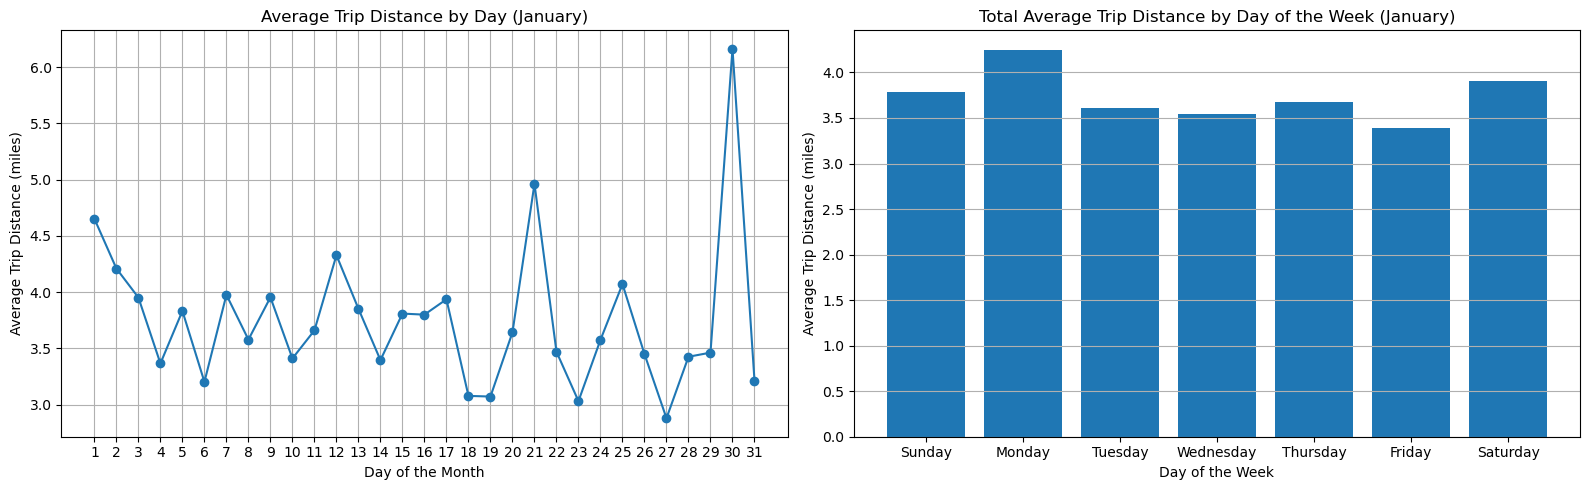

In [70]:
# Calculate average trip distance by day over the course of the month
avg_trip_distance_by_day = df_january.groupby('pickup_day')['trip_distance'].mean()

# Calculate total average trip distance by day of the week
avg_trip_distance_by_weekday = df_january.groupby('pickup_weekday')['trip_distance'].mean()

# Day names for labeling the plots
day_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Create a figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Average trip distance by day over the course of the month
ax1.plot(avg_trip_distance_by_day.index, avg_trip_distance_by_day.values, marker='o')
ax1.set_title('Average Trip Distance by Day (January)')
ax1.set_xlabel('Day of the Month')
ax1.set_ylabel('Average Trip Distance (miles)')
ax1.grid(True)
ax1.set_xticks(range(1, 32))  # Assuming January has 31 days

# Plot 2: Total average trip distance by day of the week
ax2.bar(avg_trip_distance_by_weekday.index, avg_trip_distance_by_weekday.values, tick_label=day_names)
ax2.set_title('Total Average Trip Distance by Day of the Week (January)')
ax2.set_xlabel('Day of the Week')
ax2.set_ylabel('Average Trip Distance (miles)')
ax2.grid(axis='y')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

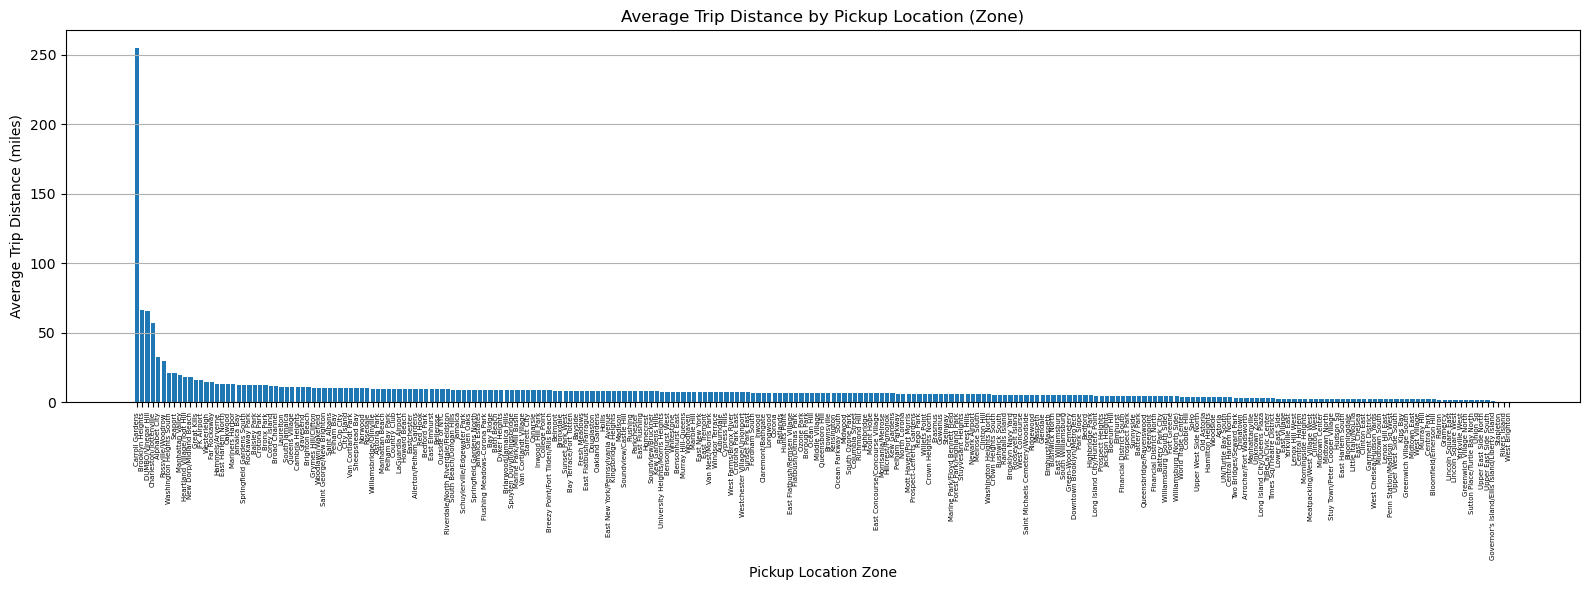

Overall Average Trip Distance: 8.704670998800912 miles


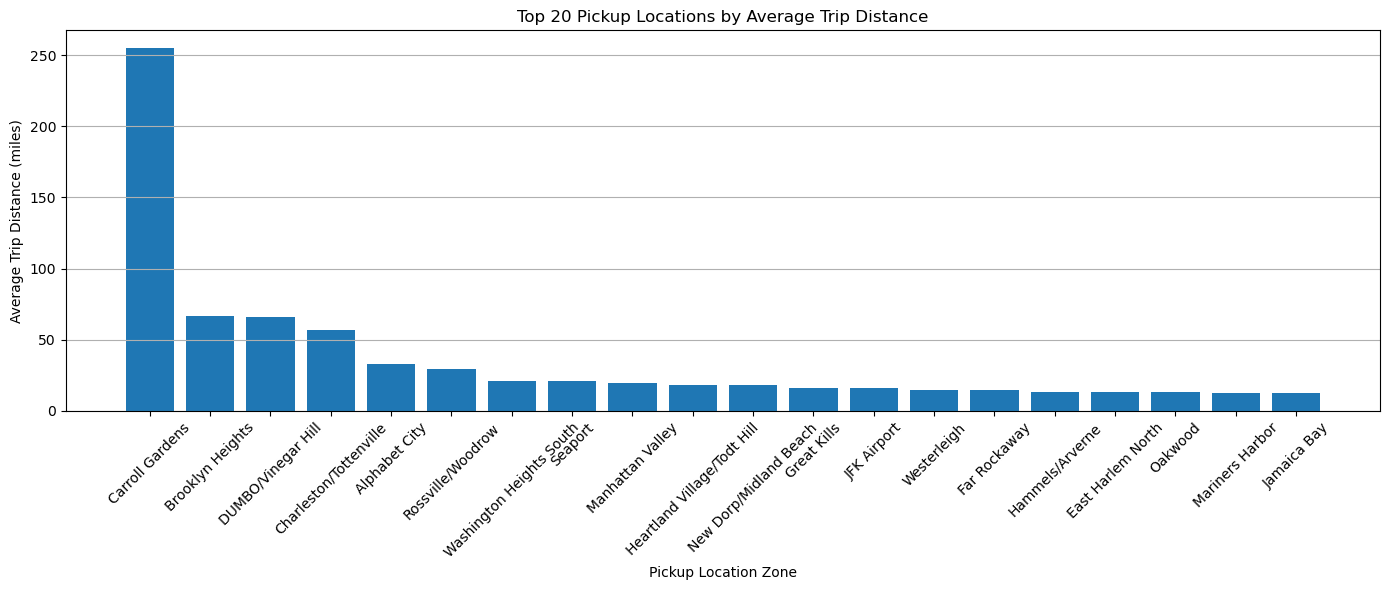

In [88]:
# Calculate the average trip distance for each PULocationID
avg_trip_distance_by_location = df_january.groupby('PULocationID')['trip_distance'].mean().reset_index()

# Merge with zone_lookup to get descriptive labels for each pickup location
avg_trip_distance_with_zone = avg_trip_distance_by_location.merge(
    zone_lookup[['LocationID', 'Zone', 'Borough']], left_on='PULocationID', right_on='LocationID', how='left'
)

# Handle missing Zone values by filling with 'Unknown Zone'
avg_trip_distance_with_zone['Zone'] = avg_trip_distance_with_zone['Zone'].fillna('Unknown Zone')

# Sort by average trip distance for better visualization
avg_trip_distance_with_zone = avg_trip_distance_with_zone.sort_values(by='trip_distance', ascending=False)

# Plot: Bar plot of average trip distance by Pickup Location (Zone)
plt.figure(figsize=(16, 6))
plt.bar(avg_trip_distance_with_zone['Zone'], avg_trip_distance_with_zone['trip_distance'])
plt.title('Average Trip Distance by Pickup Location (Zone)')
plt.xlabel('Pickup Location Zone')
plt.ylabel('Average Trip Distance (miles)')
plt.xticks(rotation=90, fontsize=5)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Calculate the average trip distance for each PULocationID
avg_trip_distance_by_location = df_january.groupby('PULocationID')['trip_distance'].mean().reset_index()

# Calculate the overall average of these average distances
overall_average_trip_distance = avg_trip_distance_by_location['trip_distance'].mean()

print("Overall Average Trip Distance:", overall_average_trip_distance, "miles")

# Select top 20 locations by average trip distance
top_20_locations = avg_trip_distance_with_zone.head(20)

# Plot top 20 locations
plt.figure(figsize=(14, 6))
plt.bar(top_20_locations['Zone'], top_20_locations['trip_distance'])
plt.title('Top 20 Pickup Locations by Average Trip Distance')
plt.xlabel('Pickup Location Zone')
plt.ylabel('Average Trip Distance (miles)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

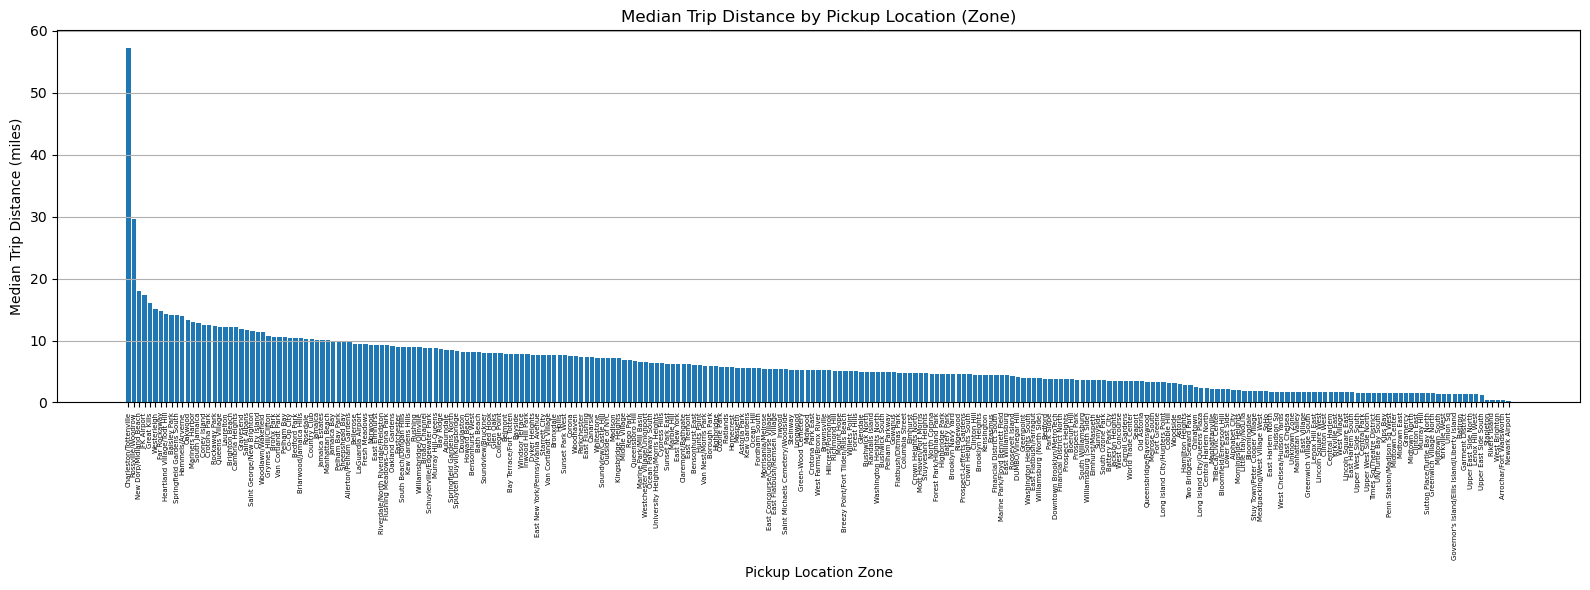

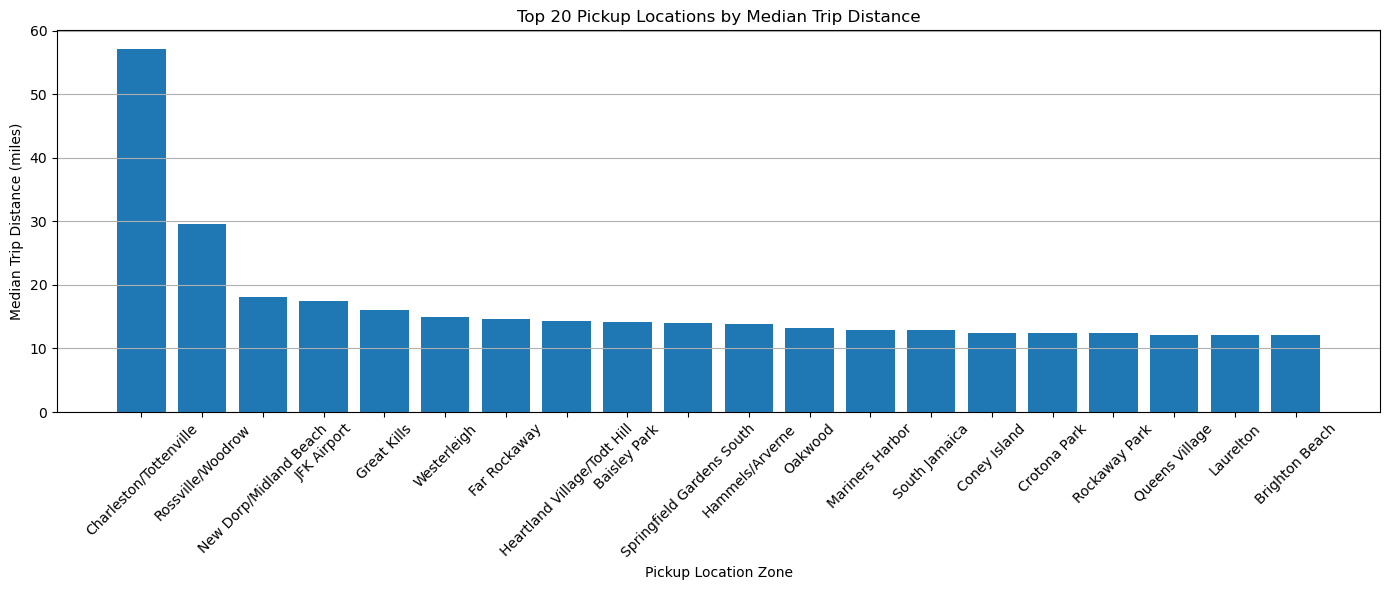

In [89]:
# Calculate the median trip distance for each PULocationID
median_trip_distance_by_location = df_january.groupby('PULocationID')['trip_distance'].median().reset_index()

# Merge with zone_lookup to get descriptive labels for each pickup location
median_trip_distance_with_zone = median_trip_distance_by_location.merge(
    zone_lookup[['LocationID', 'Zone', 'Borough']], left_on='PULocationID', right_on='LocationID', how='left'
)

# Handle missing Zone values by filling with 'Unknown Zone'
median_trip_distance_with_zone['Zone'] = median_trip_distance_with_zone['Zone'].fillna('Unknown Zone')

# Sort by median trip distance for better visualization
median_trip_distance_with_zone = median_trip_distance_with_zone.sort_values(by='trip_distance', ascending=False)

# Plot: Bar plot of median trip distance by Pickup Location (Zone)
plt.figure(figsize=(16, 6))
plt.bar(median_trip_distance_with_zone['Zone'], median_trip_distance_with_zone['trip_distance'])
plt.title('Median Trip Distance by Pickup Location (Zone)')
plt.xlabel('Pickup Location Zone')
plt.ylabel('Median Trip Distance (miles)')
plt.xticks(rotation=90, fontsize=5)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Sort by median trip distance and select the top 20 locations
top_20_locations = median_trip_distance_with_zone.sort_values(by='trip_distance', ascending=False).head(20)

# Plot: Bar plot of median trip distance for the top 20 Pickup Locations (Zone)
plt.figure(figsize=(14, 6))
plt.bar(top_20_locations['Zone'], top_20_locations['trip_distance'])
plt.title('Top 20 Pickup Locations by Median Trip Distance')
plt.xlabel('Pickup Location Zone')
plt.ylabel('Median Trip Distance (miles)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

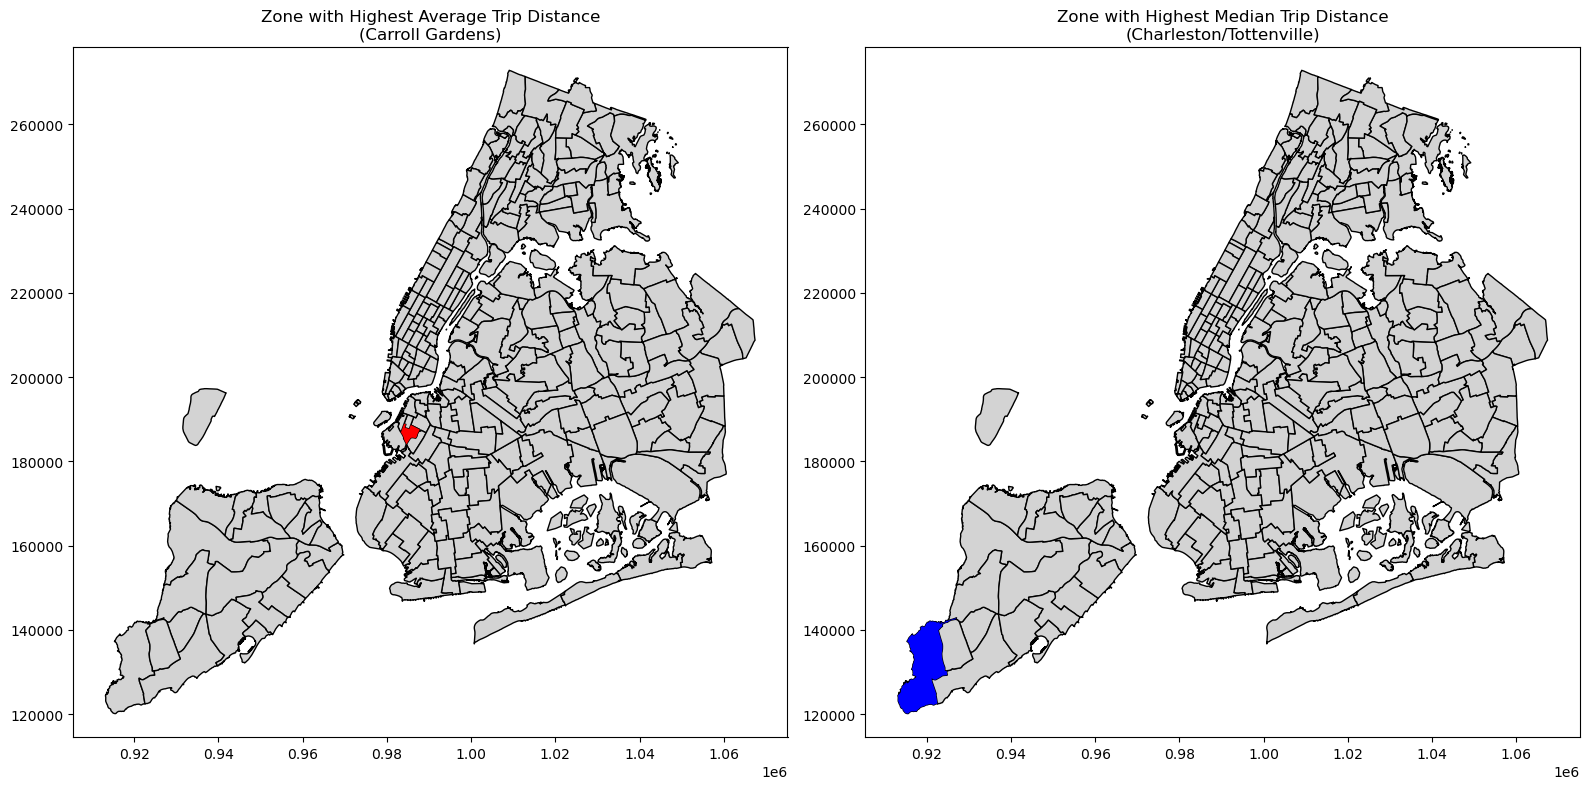

In [82]:
# Find the zones with the highest average and median trip distances
highest_avg_zone = zone_shp.loc[zone_shp['trip_distance_avg'].idxmax()]
highest_median_zone = zone_shp.loc[zone_shp['trip_distance_median'].idxmax()]

# Create a figure for the two maps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Map: Highlight the zone with the highest average trip distance
zone_shp.plot(color='lightgrey', edgecolor='black', ax=ax1)
highlight_avg_zone = zone_shp[zone_shp['LocationID_x'] == highest_avg_zone['LocationID_x']]
highlight_avg_zone.plot(color='red', ax=ax1)  # Highlight zone in red
ax1.set_title(f"Zone with Highest Average Trip Distance\n({highest_avg_zone['Zone']})")
ax1.axis('equal')  # Maintain aspect ratio

# Map: Highlight the zone with the highest median trip distance
zone_shp.plot(color='lightgrey', edgecolor='black', ax=ax2)
highlight_median_zone = zone_shp[zone_shp['LocationID_x'] == highest_median_zone['LocationID_x']]
highlight_median_zone.plot(color='blue', ax=ax2)  # Highlight zone in blue
ax2.set_title(f"Zone with Highest Median Trip Distance\n({highest_median_zone['Zone']})")
ax2.axis('equal')  # Maintain aspect ratio

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [91]:
top_50_trip_distances = df_january.sort_values(by='trip_distance', ascending=False).head(50)

# Print the top 50 entries
print(top_50_trip_distances)

        tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2867641  2024-01-30 06:37:00   2024-01-30 06:50:00              NaN   
2848124  2024-01-25 08:39:00   2024-01-25 09:06:00              NaN   
2828109  2024-01-20 08:01:00   2024-01-20 08:26:00              NaN   
2835398  2024-01-21 11:58:00   2024-01-21 12:12:00              NaN   
2812128  2024-01-17 08:41:00   2024-01-17 09:23:00              NaN   
2770904  2024-01-05 15:46:00   2024-01-05 16:17:00              NaN   
2780797  2024-01-09 07:13:00   2024-01-09 07:17:00              NaN   
2844858  2024-01-24 12:26:00   2024-01-24 12:42:00              NaN   
2792328  2024-01-12 05:16:00   2024-01-12 05:26:00              NaN   
2792703  2024-01-12 07:18:00   2024-01-12 07:38:00              NaN   
2798277  2024-01-13 14:00:00   2024-01-13 14:13:00              NaN   
2835067  2024-01-21 07:02:00   2024-01-21 07:22:00              NaN   
2798343  2024-01-13 15:50:00   2024-01-13 16:05:00              NaN   
280861

In [92]:
# Filter for entries where PULocationID is 40, sort by trip_distance, and select the top 50
top_50_trip_distances_pulocation_40 = df_january[df_january['PULocationID'] == 40].sort_values(by='trip_distance', ascending=False).head(50)

# Print the top 50 entries
print(top_50_trip_distances_pulocation_40)

        tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2828109  2024-01-20 08:01:00   2024-01-20 08:26:00              NaN   
2774824  2024-01-06 19:16:36   2024-01-06 19:54:49              NaN   
1096313  2024-01-13 21:44:18   2024-01-13 22:17:19              1.0   
837614   2024-01-11 10:08:35   2024-01-11 10:44:04              1.0   
517413   2024-01-07 09:43:11   2024-01-07 10:35:46              1.0   
2812123  2024-01-17 08:29:39   2024-01-17 09:28:23              NaN   
85433    2024-01-02 10:05:06   2024-01-02 11:19:06              1.0   
608098   2024-01-08 15:17:57   2024-01-08 16:45:02              1.0   
1217721  2024-01-15 11:46:51   2024-01-15 13:08:27              1.0   
2280724  2024-01-26 21:07:22   2024-01-26 21:40:05              5.0   
2871002  2024-01-31 08:00:00   2024-01-31 08:39:00              NaN   
2860640  2024-01-28 01:21:59   2024-01-28 01:47:56              NaN   
2865500  2024-01-29 07:57:26   2024-01-29 08:33:32              NaN   
278808

In [93]:
# Filter for entries where PULocationID is 40 and calculate the average trip distance
average_trip_distance_pulocation_40 = df_january[df_january['PULocationID'] == 40]['trip_distance'].mean()

# Print the average trip distance
print("Average trip distance for PULocationID 40:", average_trip_distance_pulocation_40)

Average trip distance for PULocationID 40: 254.68493902439022
